In [6]:
from HierarchyClustering import hierarchy
from Linkages import single_linked
from Linkages import complete_linked
from Linkages import min_max_linked
from Linkages import group_average_linked
from UltrametricMatrix import ultramatrix
import scipy.stats as sts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

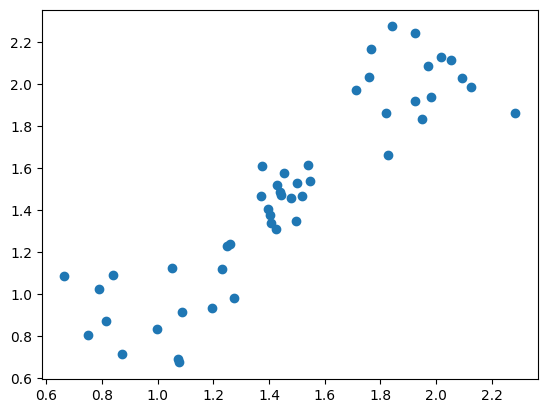

In [12]:
# Генерируем точки из нормального распределения
N = 48
N = int(N / 3)

norm1 = sts.norm(1, 0.2)
norm2 = sts.norm(1.5, 0.1)
norm3 = sts.norm(2, 0.2)

x = np.append(norm1.rvs(N), np.append(norm2.rvs(N), norm3.rvs(N), axis=0), axis=0)
y = np.append(norm1.rvs(N), np.append(norm2.rvs(N), norm3.rvs(N), axis=0), axis=0)

points = list(zip(x, y))
plt.scatter(x, y, marker="o")
plt.show()

In [8]:
hierarchy_clusters = hierarchy(points, metric='euclidean', method=min_max_linked)

Distance matrix: 0 step
          0         1         2         3         4         5         6   \
0   0.000000  0.261223  0.091831  0.157946  0.248707  0.322578  0.168025   
1   0.261223  0.000000  0.195937  0.301014  0.389976  0.176940  0.295215   
2   0.091831  0.195937  0.000000  0.123202  0.222073  0.231036  0.229238   
3   0.157946  0.301014  0.123202  0.000000  0.099113  0.265599  0.325201   
4   0.248707  0.389976  0.222073  0.099113  0.000000  0.319354  0.416529   
..       ...       ...       ...       ...       ...       ...       ...   
94  0.105317  0.218716  0.142314  0.250423  0.346927  0.336362  0.091194   
95  0.037480  0.295946  0.114925  0.148155  0.230237  0.344513  0.189418   
96  0.262967  0.394869  0.232236  0.110356  0.016800  0.316630  0.430949   
97  0.219708  0.063045  0.142641  0.239633  0.327156  0.144115  0.288599   
98  0.154631  0.257910  0.203447  0.307692  0.402226  0.391562  0.037316   

          7         8         9   ...        89        90      

In [9]:
start_matrix = hierarchy_clusters[1]
finish_matrix = ultramatrix(hierarchy_clusters[0], hierarchy_clusters[2])

In [10]:
n_points = len(start_matrix) 
N_edge = n_points * (n_points - 1) / 2

SomeMetric = np.sum(np.abs(finish_matrix - start_matrix)) / N_edge
SomeMetric

0.3255476811144343